<a href="https://colab.research.google.com/github/matsonah/ClarkeStatsSpring2022/blob/main/Spring_2022_Module_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 9
This is in [Chapter 9](https://openstax.org/books/introductory-statistics/pages/9-1-null-and-alternative-hypotheses)


Code Block 1: Load Data 

Code Block 2: One population, quant

Code Block 3: Load data 

Code Block 2: One population, qual


In [1]:
### Code Block 1: Load data

mydata <- read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/World_Population.csv"))
str(mydata)

'data.frame':	235 obs. of  12 variables:
 $ Rank                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Country..or.dependency.: chr  "China" "India" "United States" "Indonesia" ...
 $ Population...2020      : int  1439323776 1380004385 331002651 273523615 220892340 212559417 206139589 164689383 145934462 128932753 ...
 $ Yearly.change          : num  0 0.01 0.01 0.01 0.02 0.01 0.03 0.01 0 0.01 ...
 $ Net.change             : int  5540090 13586631 1937734 2898047 4327022 1509890 5175990 1643222 62206 1357224 ...
 $ Density.P.Km.2         : int  153 464 36 151 287 25 226 1265 9 66 ...
 $ Land.Area..Km.2.       : int  9388211 2973190 9147420 1811570 770880 8358140 910770 130170 16376870 1943950 ...
 $ Migrants..net.         : int  -348399 -532687 954806 -98955 -233379 21200 -60000 -369501 182456 -60000 ...
 $ Fert..Rate             : chr  "1.70" "2.20" "1.80" "2.30" ...
 $ Med..Age               : chr  "38.00" "28.00" "38.00" "30.00" ...
 $ Urban.Pop..            : chr  "0.61" "0.35" "0.83

We are 95% confident the actual mean is between 178.7952 and 778.0218.
The p-value of this test is 0.134462 which is like flipping 3 coins and getting all heads.


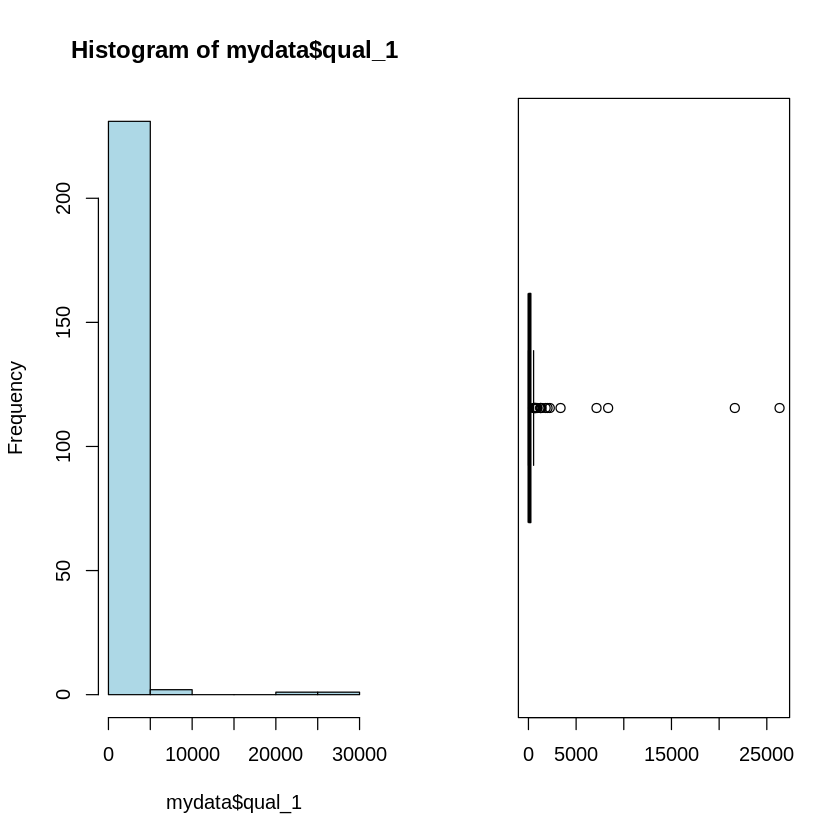

In [2]:
#### Code Block 2: One Population 

### Step 1: Gather Data & Hypotheses
#Enter Data & Declare the null & alternative hypotheses.


mydata$qual_1 = mydata$`Density.P.Km.2`
mydata = subset(mydata, !is.na(mydata$qual_1))

### null and alternative hypotheses for single population
m0=250   #If doing a single t-test on one population. 
testtype="two.sided"  # "two.sided" or "less" or "greater" 

### Step 2: Analyze the data
res <- t.test(mydata$qual_1, mu=m0, alternative=testtype)

par(mfrow=c(1,2))
hist(mydata$qual_1, col="light blue")
boxplot(mydata$qual_1, horizontal=T, col="light blue")

#### Step 3: Interpret results 
cat(sep="","We are 95% confident the actual mean is between ",res$conf.int[1]," and ", res$conf.int[2],".\n")
pval = res$p.value
sval = -log2(pval)
cat(sep="","The p-value of this test is ", if(pval ==1) "super close to 1" else if (pval < 0.00001) "really tiny" else pval, " which is like flipping ", if (sval <1) 1 else if (sval == Inf) "a whole lot of" else round(sval), " coins and getting all heads.\n")

In [14]:
### Code Block 3: Load Qualitative Data 

mydata = read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/AHRQ%20Reasons%20Difficulty%20Care.csv"))
str(mydata)


'data.frame':	16 obs. of  4 variables:
 $ Year             : int  2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 ...
 $ Cannot.afford    : int  3135 3625 4174 5274 6940 7226 6778 7116 7607 6314 ...
 $ Insurance.related: int  2228 1923 2405 2044 1852 1555 1287 1739 1522 1655 ...
 $ Other            : int  7919 7671 7451 6445 6681 6056 5990 5610 6123 6072 ...


Year Chosen: 2009 

We are 95% confident the population proportion is between 0.4908183 and 0.5066903.
The p-value of this test is really tiny which is like flipping a whole lot of coins and getting all heads.


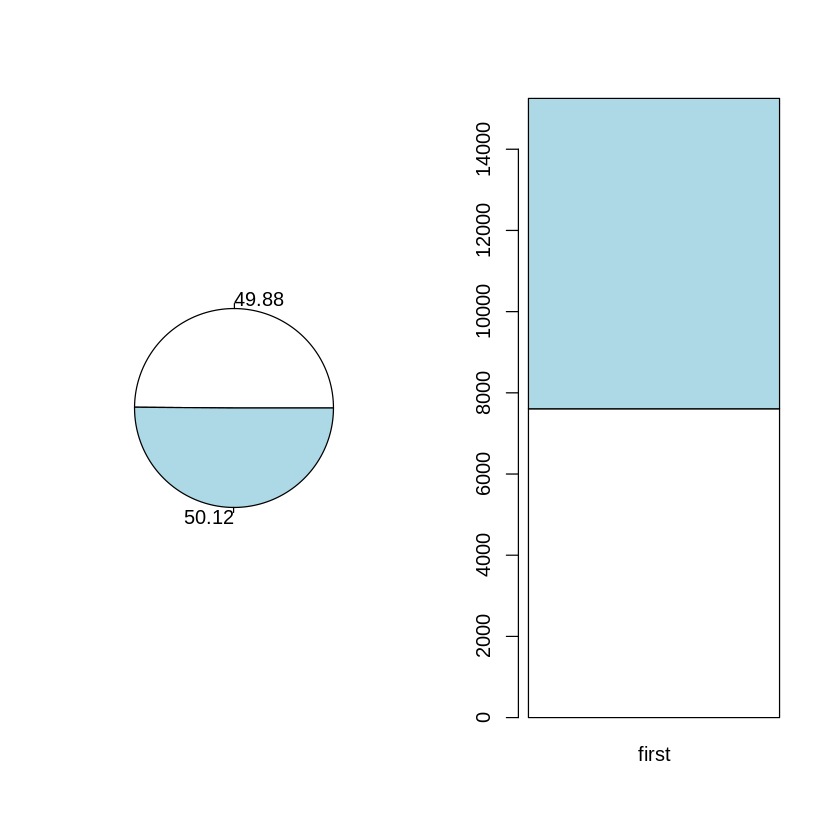

In [25]:
#### Code Block 4: One Population, Qualitative Data

### Step 1: Gather Data & Hypotheses
#Enter Data & Declare the null & alternative hypotheses.

year = sample(1:16,1)+2001
cat("Year Chosen:", year, "\n\n")
pick = subset(mydata, Year == year)


count1 = pick$Cannot.afford 
#count1 = 789

total1 = pick$Cannot.afford + pick$Insurance.related + pick$Other
#total1 = 1000

pi0=0.88
testtype="two.sided"   # "two.sided" or "less" or "greater" depending on your alternative hypothesis

#### Step 2: format data for R
count_comp1=total1-count1
first = c(count1,count_comp1)
labs1=round(first/total1*100,2)


data_1 = rep(c(1,0), c(count1, count_comp1))

combined = data.frame(first)

#### Step 3: analyze data

par(mfrow=c(1,2))
pie(combined$first, labels=labs1)
barplot(cbind(first), col=c("white", "light blue"), ylim=c(0,total1))

res <- t.test(data_1, mu= pi0, alternative=testtype)  #https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/t.test

#### Code Block 3: Interpret results 
cat(sep="","We are 95% confident the population proportion is between ",res$conf.int[1]," and ", res$conf.int[2],".\n")
pval = res$p.value
sval = -log2(pval)
cat(sep="","The p-value of this test is ", if(pval ==1) "super close to 1" else if (pval < 0.00001) "really tiny" else pval, " which is like flipping ", if (sval <1) 1 else if (sval == Inf) "a whole lot of" else round(sval), " coins and getting all heads.\n")
